In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


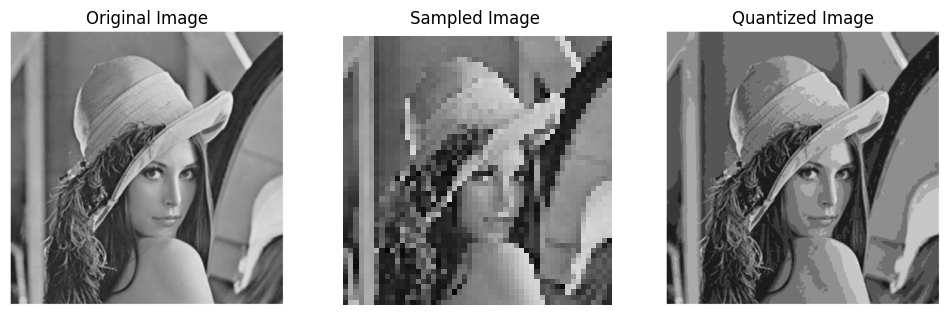

In [ ]:

def sample_image(image, factor):
    height, width = image.shape[:2]
    sampled_image = cv2.resize(image, (width // factor, height // factor), interpolation=cv2.INTER_NEAREST)
    return sampled_image

def quantize_image(image, levels):
    quantized_image = np.floor(image / (256 // levels)) * (256 // levels)
    quantized_image = quantized_image.astype(np.uint8)
    return quantized_image

def plot_images(original, sampled, quantized):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(sampled, cmap='gray')
    plt.title('Sampled Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(quantized, cmap='gray')
    plt.title('Quantized Image')
    plt.axis('off')

    plt.show()



image_path=r'C:\Users\User\Desktop\Year 4\2nd Term\Image Processing\2_Labs\Others\Grey-scale-Lena-image-256256.png'
sampling_factor=14
quantization_levels=9

# Load image in grayscale
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if original_image is None:
    print(f"Error: Unable to load image at {image_path}")

# Sample and quantize
sampled_image = sample_image(original_image, sampling_factor)
quantized_image = quantize_image(original_image, quantization_levels)

# Plot results
plot_images(original_image, sampled_image, quantized_image)



#Arithmetic Operations


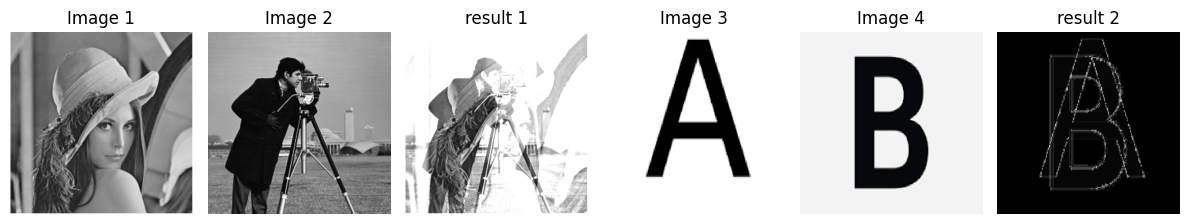

In [16]:

from PIL import Image
img1=Image.open(r"C:\Users\User\Desktop\Year 4\2nd Term\Image Processing\2_Labs\Others\Grey-scale-Lena-image-256256.png")
img2=Image.open (r"C:\Users\User\Desktop\Year 4\2nd Term\Image Processing\2_Labs\Others\cameraman.png")

resize=(400,400)
img1 = img1.convert("L").resize(resize, Image.Resampling.LANCZOS)
img2 = img2.convert("L").resize(resize, Image.Resampling.LANCZOS)

im1arr=np.asarray(img1, dtype=np.uint16)
im2arr=np.asarray(img2, dtype=np.uint16)


addition=im1arr+im2arr
addition = np.clip(addition, 0, 255).astype(np.uint8)

resultImage=Image.fromarray(addition)



#Sets and Logical Operations

img3=Image.open(r'C:\Users\User\Desktop\Year 4\2nd Term\Image Processing\2_Labs\Others\A.png')


img4=Image.open(r'C:\Users\User\Desktop\Year 4\2nd Term\Image Processing\2_Labs\Others\B.png')



resize=(400,400)
img3=img3.resize(resize,Image.Resampling.LANCZOS)
img4=img4.resize(resize,Image.Resampling.LANCZOS)

im3arr=np.asarray(img3)
im4arr=np.asarray(img4)

union=im4arr|im3arr
resultImage2=Image.fromarray(union)



fig, axes = plt.subplots(1, 6, figsize=(12,4))

axes[0].imshow(img1, cmap='gray')
axes[0].set_title("Image 1")
axes[0].axis('off')

axes[1].imshow(img2, cmap='gray')
axes[1].set_title("Image 2")
axes[1].axis('off')

axes[2].imshow(resultImage, cmap='gray')
axes[2].set_title("result 1")
axes[2].axis('off') 

axes[3].imshow(img3, cmap='gray')
axes[3].set_title("Image 3")
axes[3].axis('off')

axes[4].imshow(img4, cmap='gray')
axes[4].set_title("Image 4")
axes[4].axis('off')

axes[5].imshow(resultImage2, cmap='gray')
axes[5].set_title("result 2")
axes[5].axis('off')
plt.tight_layout()
plt.show()

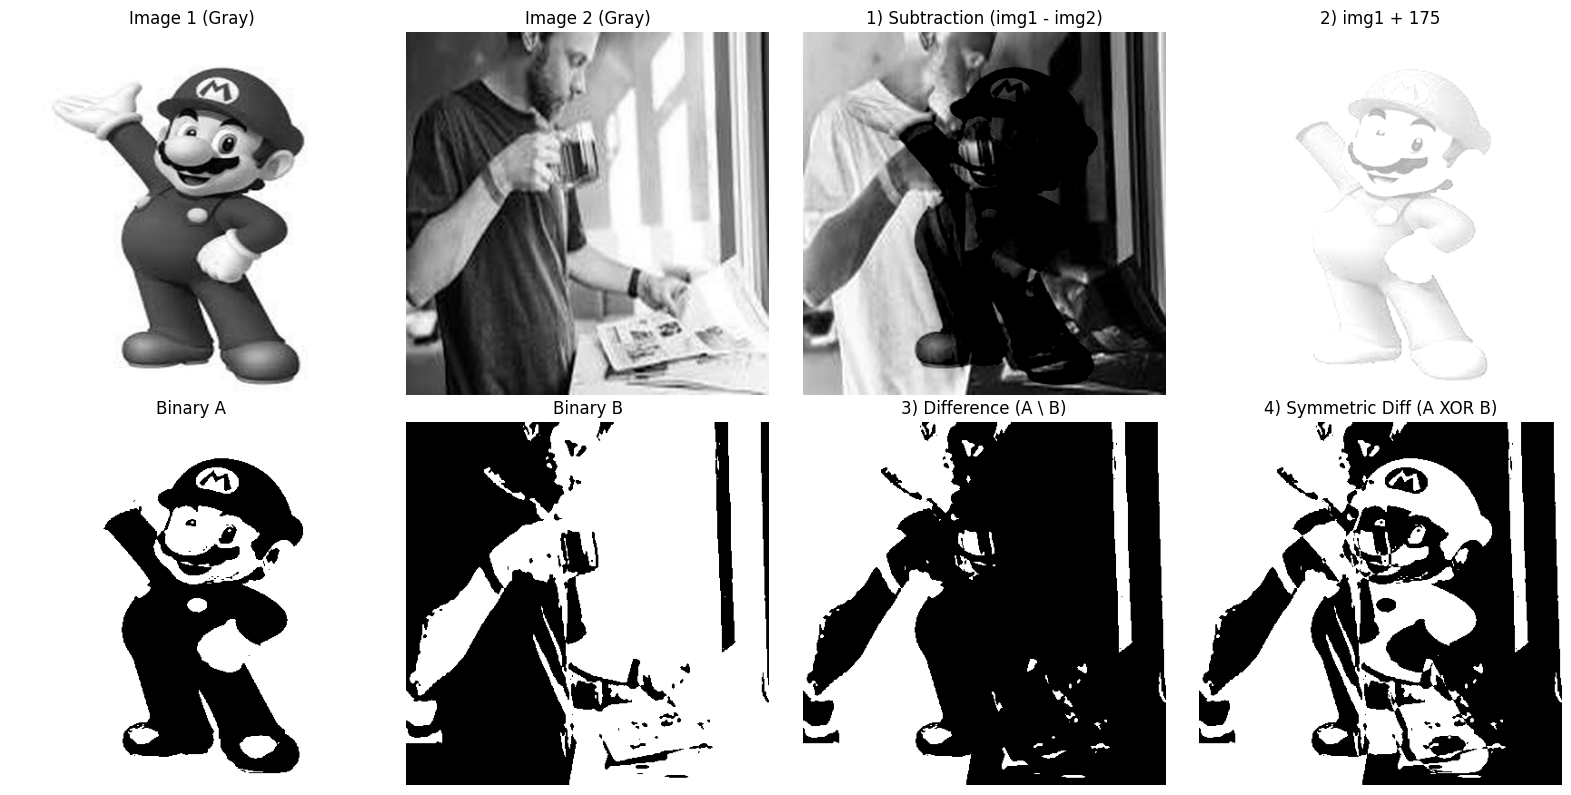

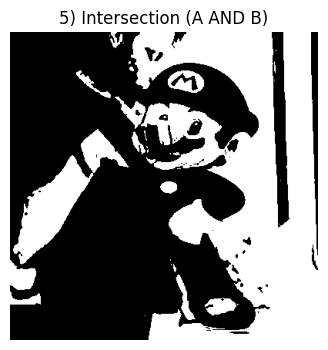

In [ ]:

img1 = Image.open(r"C:\Users\User\Desktop\Year 4\2nd Term\Image Processing\2_Labs\Others\mario.png").convert("L")
img2 = Image.open(r"C:\Users\User\Desktop\Year 4\2nd Term\Image Processing\2_Labs\Others\drink_tea.png").convert("L")


resize = (400, 400)
img1 = img1.resize(resize, Image.Resampling.LANCZOS)
img2 = img2.resize(resize, Image.Resampling.LANCZOS)

im1 = np.array(img1, dtype=np.int16)   
im2 = np.array(img2, dtype=np.int16)


sub = im1 - im2
sub = np.clip(sub, 0, 255).astype(np.uint8)


add_const = im1 + 175
add_const = np.clip(add_const, 0, 255).astype(np.uint8)

im1_bin = ((im1 > 128) * 255).astype(np.uint8)
im2_bin = ((im2 > 128) * 255).astype(np.uint8)

diff = (im1_bin & (~im2_bin))
diff = diff.astype(np.uint8)

sym_diff = (im1_bin ^ im2_bin)

intersect = (im1_bin & im2_bin)

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

axes[0,0].imshow(im1, cmap="gray", vmin=0, vmax=255)
axes[0,0].set_title("Image 1")
axes[0,0].axis("off")

axes[0,1].imshow(im2, cmap="gray", vmin=0, vmax=255)
axes[0,1].set_title("Image 2")
axes[0,1].axis("off")

axes[0,2].imshow(sub, cmap="gray", vmin=0, vmax=255)
axes[0,2].set_title("1) Subtraction")
axes[0,2].axis("off")

axes[0,3].imshow(add_const, cmap="gray", vmin=0, vmax=255)
axes[0,3].set_title("2) img1 + 175")
axes[0,3].axis("off")

axes[1,0].imshow(im1_bin, cmap="gray", vmin=0, vmax=255)
axes[1,0].set_title("Binary A")
axes[1,0].axis("off")

axes[1,1].imshow(im2_bin, cmap="gray", vmin=0, vmax=255)
axes[1,1].set_title("Binary B")
axes[1,1].axis("off")

axes[1,2].imshow(diff, cmap="gray", vmin=0, vmax=255)
axes[1,2].set_title("3) Difference (A \\ B)")
axes[1,2].axis("off")

axes[1,3].imshow(sym_diff, cmap="gray", vmin=0, vmax=255)
axes[1,3].set_title("4) Symmetric Diff (A XOR B)")
axes[1,3].axis("off")

plt.tight_layout()
plt.show()

plt.figure(figsize=(4,4))
plt.imshow(intersect, cmap="gray", vmin=0, vmax=255)
plt.title("5) Intersection (image 1 AND image 2)")
plt.axis("off")
plt.show()